# DEEP LEARNING P2
### Name: Aniket Raut
### Roll no. : 22
### Batch : B2


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('iris.csv')

In [ ]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
le = LabelEncoder()
df['variety'] = le.fit_transform(df['variety'])
print(df)

     sepal.length  sepal.width  petal.length  petal.width  variety
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


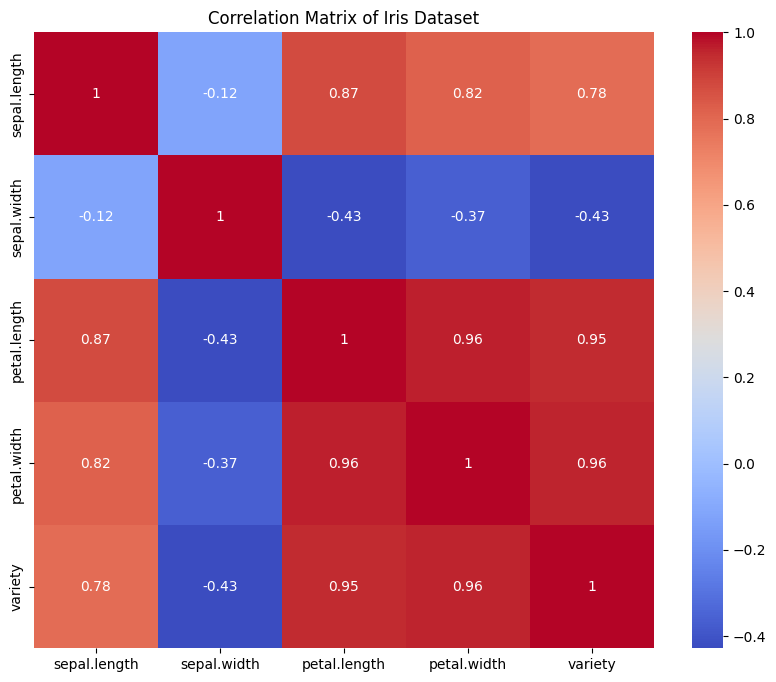

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame as defined in the previous code

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

In [ ]:
X = df[['petal.length', 'petal.width']]
Y = df['variety']

In [ ]:
X

,petal.length,petal.width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [ ]:
Y

,variety
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

In [ ]:
class MPNeuron:
    def __init__(self):
        self.b = None

    def model(self, x):
        x = pd.to_numeric(x, errors='coerce')
        return (np.sum(x) >= self.b)

    def predict(self, X):
        Y = []
        for index, row in X.iterrows():
            result = self.model(row)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y):
        accuracy = {}
        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)
        best_b = max(accuracy, key=accuracy.get)
        self.b = best_b
        print('Optimal value of b is', best_b)
        print('Highest accuracy on training set is', accuracy[best_b])

In [ ]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_train, Y_train)

Optimal value of b is 2
Highest accuracy on training set is 0.6333333333333333


In [ ]:

Y_test_pred = mp_neuron.predict(X_test)



accuracy = accuracy_score(Y_test, Y_test_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.5666666666666667


In [ ]:
class PNeuron:
    def __init__(self):
        self.b = 2

    def model(self, x):
        x = pd.to_numeric(x, errors='coerce')
        return (np.sum(x) >= self.b)

    def predict(self, X):
        Y = []
        for index, row in X.iterrows():
            result = self.model(row)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y):
        accuracy = {}
        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)
        best_b = max(accuracy, key=accuracy.get)
        self.b = best_b
        print('Optimal value of b is', best_b)
        print('Highest accuracy on training set is', accuracy[best_b])

In [ ]:
p_neuron = PNeuron()
p_neuron.fit(X_train, Y_train)

Optimal value of b is 2
Highest accuracy on training set is 0.6333333333333333
